<a href="https://colab.research.google.com/github/KhinSu2Hlaing/Wine_Quality_Prediction/blob/main/Red_Wine_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import pickle
import yaml

In [2]:
# load dataset
wine = pd.read_csv("/content/WineQT.csv")

df = wine.copy()

df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.56,9.4,5


In [3]:
print(df.columns)
print(df.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1143, 8)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   chlorides             1143 non-null   float64
 4   total sulfur dioxide  1143 non-null   float64
 5   sulphates             1143 non-null   float64
 6   alcohol               1143 non-null   float64
 7   quality               1143 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 71.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.600,7.1000,7.900,9.10,15.900
volatile acidity,1143.0,0.531339,0.179633,0.120,0.3925,0.520,0.64,1.580
citric acid,1143.0,0.268364,0.196686,0.000,0.0900,0.250,0.42,1.000
chlorides,1143.0,0.086933,0.047267,0.012,0.0700,0.079,0.09,0.611
total sulfur dioxide,1143.0,45.914698,32.782130,6.000,21.0000,37.000,61.00,289.000
sulphates,1143.0,0.657708,0.170399,0.330,0.5500,0.620,0.73,2.000
alcohol,1143.0,10.442111,1.082196,8.400,9.5000,10.200,11.10,14.900
quality,1143.0,5.657043,0.805824,3.000,5.0000,6.000,6.00,8.000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

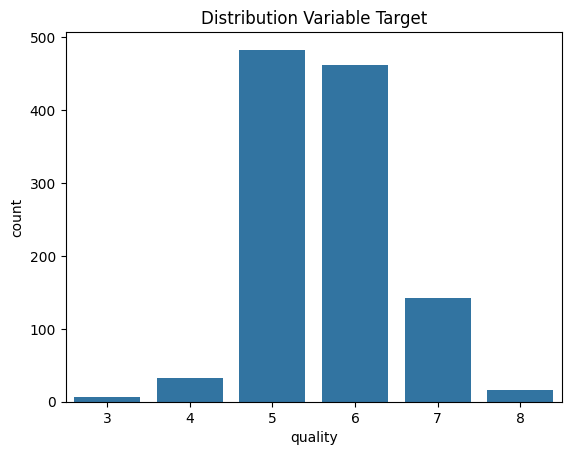

In [7]:
sns.countplot(data=df, x= 'quality')
plt.title('Distribution Variable Target')
plt.show()

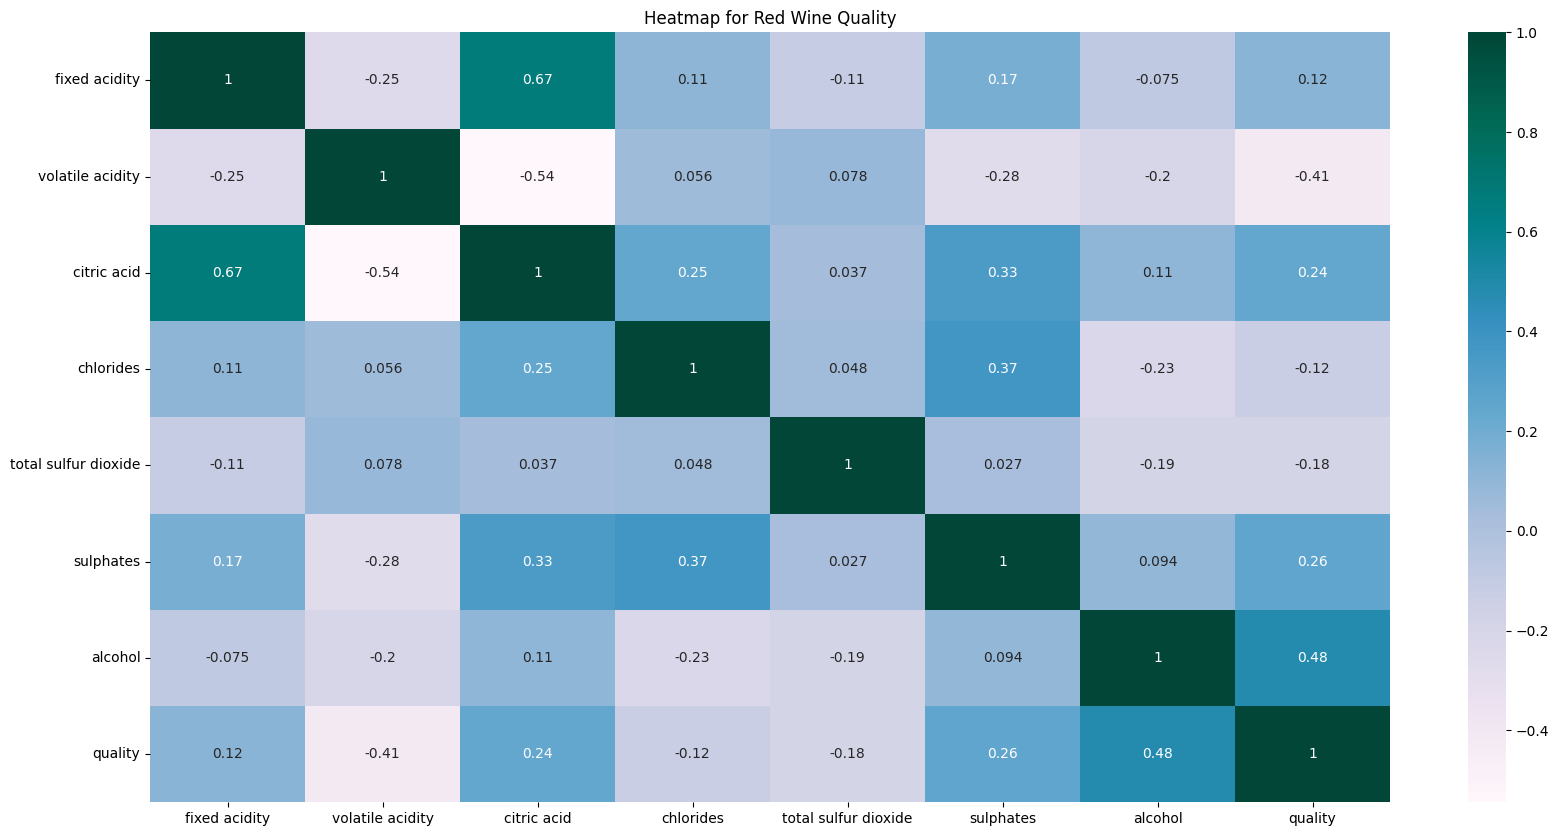

In [8]:

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap= 'PuBuGn')
plt.title("Heatmap for Red Wine Quality")
plt.show()

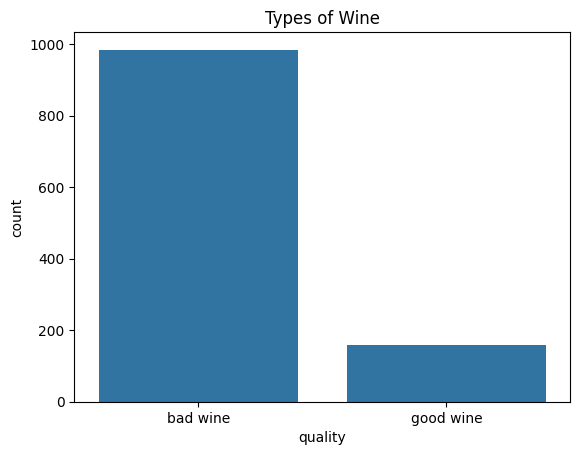

In [9]:

df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

sns.countplot(data = df, x = 'quality')
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()

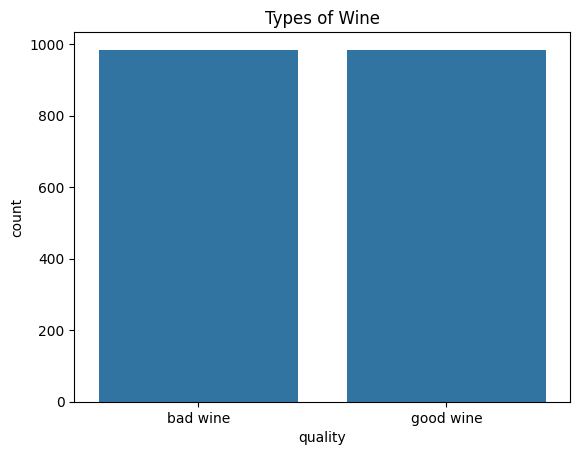

In [10]:
#parameter for requires seed
random_value = 1000

X = df.drop(['quality'], axis=1)
y = df.quality

#ran = RandomOverSampler(random_state=random_value)
#X_ros, y_ros = ran.fit_resample(X, y)
oversample = SMOTE()
X_ros, y_ros = oversample.fit_resample(X, y)

sns.countplot(x=y_ros)
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()

In [11]:
# split dataset to train and test variable
# use test size of 20% of the data proportion
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=random_value)
X_train.shape, X_test.shape

((1574, 7), (394, 7))

In [12]:

# scale with StandardScaler
scaler = StandardScaler()

# fit to data training
scaler.fit(X_train)

# transform
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [13]:

# Random Forest Regression initialization
rfc = RandomForestClassifier(n_estimators=100, random_state=random_value)

# Cross Validation
rf_score = cross_val_score(estimator = rfc,
                               X = x_train, y= y_train,
                               scoring = 'recall',cv = 10,
                               verbose = 3, n_jobs=-1)

# Fit data training
rfc.fit(x_train, y_train)

# Predict data test
y_pred = rfc.predict(x_test)

print('Avarage Recall score', np.mean(rf_score))
print('Test Recall score', recall_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.1s finished


Avarage Recall score 0.9585248085248086
Test Recall score 0.971830985915493


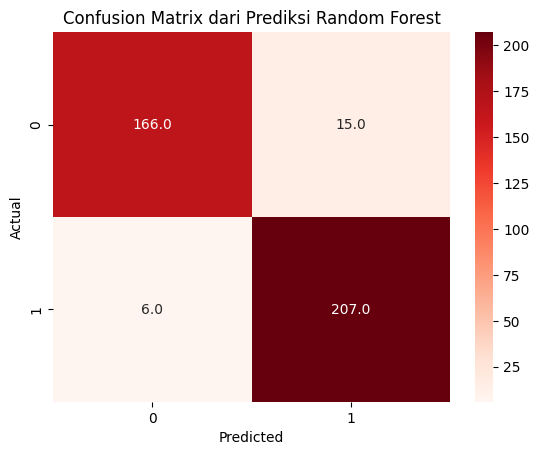

In [14]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap Confusion Matrix
sns.heatmap(conf_mat, cmap = 'Reds', annot = True, fmt='.1f')
plt.title('Confusion Matrix dari Prediksi Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Random Forest Regression initialization
rf_tuned = RandomForestClassifier(random_state=random_value)

# Cross Validation
rf_tuned_score = cross_val_score(estimator = rf_tuned,
                               X = x_train, y= y_train,
                               scoring = 'recall',cv = 10,
                               verbose = 0)

# Fit data training
rf_tuned.fit(x_train, y_train)

# Predict data test
y_pred_tuned = rf_tuned.predict(x_test)

# Cek Score
print('Avarage Recall score', np.mean(rf_score))
print('Test Recall score', recall_score(y_test, y_pred))
print('Avarage Recall score Tuning', np.mean(rf_tuned_score))
print('Test Recall score Tuning', recall_score(y_test, y_pred_tuned))

Avarage Recall score 0.9585248085248086
Test Recall score 0.971830985915493
Avarage Recall score Tuning 0.9585248085248086
Test Recall score Tuning 0.971830985915493


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# If you want to save in Colab local file system
with open('model_pickle', 'wb') as f:
    pickle.dump(rfc, f)